# Hackathon Part1: Data Cleaning and EDA

## 1.1 Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Our team are only allowed to use one dataset- cheap_train_sample.csv

In [2]:
# import dataset
data = pd.read_csv("./data/cheap_train_sample.csv")
test = pd.read_csv('./data/test_data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,>50K
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,>50K


In [3]:
data.shape

(6513, 14)

In [4]:
# check null values -- we don't see any null values in our dataset
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [5]:
# check data types
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage              object
dtype: object

In [6]:
# to have an overview of the dataset
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,6513.000000,6.513000e+03,6513.000000,6513.000000,6513.000000,6513.000000
mean,38.529556,1.926640e+05,10.068478,1059.200829,92.108092,40.400891
std,13.684351,1.060173e+05,2.589238,7392.040587,413.710886,12.354685
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,27.000000,1.202380e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.815760e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.417530e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.366120e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Assign 1 and 0 to our target variable
# To have an overview of our target variable: unbalanced class
data['wage'] = data['wage'].map({' <=50K':0,
                                ' >50K':1})
data['wage'].value_counts()

0    4945
1    1568
Name: wage, dtype: int64

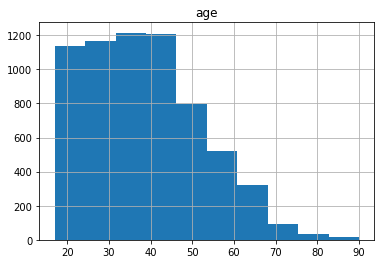

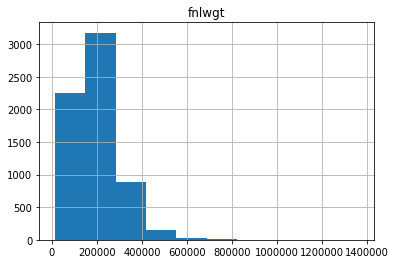

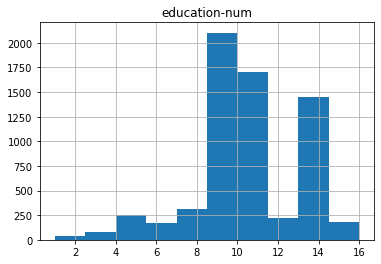

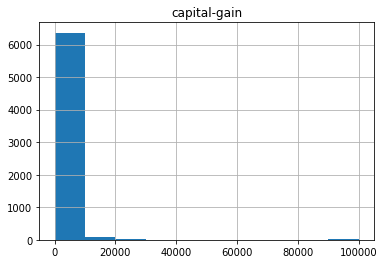

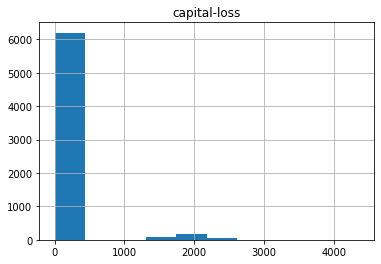

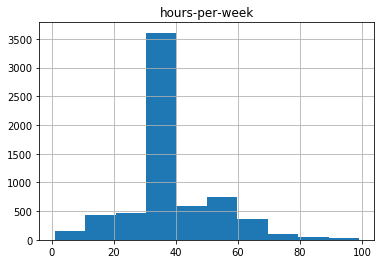

In [8]:
# In order to have a further understanding of each colmn, we devided our columns into two groups
# Columns with categorical data vs Columns with continuous data
# For Columns with continuous data: age, fnlwgt, education-num, capital-gain, capital-loss
continuous_col = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# check distribution 
for column in continuous_col:
    data.hist(column= column)

In [9]:
# Some columns are right skewed
# It seems there are outliers with capital-gain, capital-loss and fnlwgt
data[data['capital-loss']>3000]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
1986,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,0
2619,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,0


In [10]:
data[data['fnlwgt']>830000]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
450,34,Private,849857,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,Nicaragua,0
605,26,Private,917220,12th,8,Never-married,Transport-moving,Own-child,Male,0,0,40,United-States,0
1990,45,Private,1366120,Assoc-voc,11,Divorced,Other-service,Not-in-family,Female,0,0,8,United-States,0
3488,37,Private,910398,Bachelors,13,Never-married,Sales,Not-in-family,Female,0,0,40,United-States,0
3501,32,?,981628,HS-grad,9,Divorced,?,Unmarried,Male,0,0,40,United-States,0


In [11]:
# remove some outliers
data = data.drop([1986, 2619, 450, 605, 1990, 3488, 3501])

In [12]:
# log age and fnlwgt to make them normally distributed
data['age']= np.log(data['age'])
data['fnlwgt']= np.log(data['fnlwgt'])
test['age']= np.log(test['age'])
test['fnlwgt']= np.log(test['fnlwgt'])

In [13]:
# For Columns with categorical data: workclass, marital-status, occupation, relationship, sex, native-country
# remove education since it represents the same info as in education=num
# data = data.drop(['education'], axis=1)

categorical_col = ['workclass', 'marital-status', 'occupation', 'relationship', 'sex', 'native-country', 'education']

for i in categorical_col:
    print(i, data[i].unique())
    
# we decided keep' ?’, meaning unknown

workclass [' Private' ' Federal-gov' ' Self-emp-not-inc' ' State-gov'
 ' Self-emp-inc' ' ?' ' Local-gov' ' Without-pay' ' Never-worked']
marital-status [' Divorced' ' Married-civ-spouse' ' Never-married' ' Widowed'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
occupation [' Adm-clerical' ' Craft-repair' ' Sales' ' Other-service'
 ' Exec-managerial' ' Tech-support' ' Prof-specialty' ' Transport-moving'
 ' Handlers-cleaners' ' Farming-fishing' ' ?' ' Machine-op-inspct'
 ' Protective-serv' ' Priv-house-serv' ' Armed-Forces']
relationship [' Not-in-family' ' Husband' ' Wife' ' Unmarried' ' Own-child'
 ' Other-relative']
sex [' Male' ' Female']
native-country [' United-States' ' Germany' ' Iran' ' Philippines' ' Mexico' ' India'
 ' ?' ' Canada' ' South' ' El-Salvador' ' England' ' Peru' ' Japan'
 ' France' ' Columbia' ' Cuba' ' Scotland' ' Vietnam' ' Hong' ' Jamaica'
 ' Puerto-Rico' ' Nicaragua' ' Italy' ' Dominican-Republic' ' Yugoslavia'
 ' Poland' ' Guatemala' ' China' ' H

In [14]:
 data.corr()[['wage']].sort_values('wage', ascending=False)

,wage
wage,1.000000
education-num,0.323444
age,0.275111
hours-per-week,0.255036
capital-gain,0.221318
capital-loss,0.139872
fnlwgt,-0.014884


In [15]:
# dummy all categorical variables
data = pd.get_dummies(data, columns=categorical_col, drop_first=True)
test = pd.get_dummies(test, columns=categorical_col, drop_first=True)

In [16]:
data.shape

(6506, 96)

In [17]:
#store data for future use
%store data
%store test

Stored 'data' (DataFrame)
Stored 'test' (DataFrame)


## 1.2 EDA

In [18]:
data.corr()[['wage']].sort_values('wage', ascending=False).head(12)

,wage
wage,1.000000
marital-status_ Married-civ-spouse,0.449058
education-num,0.323444
age,0.275111
hours-per-week,0.255036
sex_ Male,0.229343
occupation_ Exec-managerial,0.227241
capital-gain,0.221318
occupation_ Prof-specialty,0.181716
education_ Bachelors,0.170886


In [19]:
variables = data.drop(['wage'], axis=1)

In [20]:
X = variables
y = data['wage']